## ASSIGNMENT #2 SOLUTION
Hey! I am Aryaman Sriram. This is my solution to the second assignment to the open ML course on the mlcourse.ai website. Do have a look and suggest improvements :')

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [80]:
import pandas as pd
df = pd.read_csv('2008.csv.bz2', compression='bz2', header=0, sep=',', quotechar='"')

In [55]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


# Exploratory Data Analysis

In [11]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 7009728 non-null int64
Month                7009728 non-null int64
DayofMonth           7009728 non-null int64
DayOfWeek            7009728 non-null int64
DepTime              6873482 non-null float64
CRSDepTime           7009728 non-null int64
ArrTime              6858079 non-null float64
CRSArrTime           7009728 non-null int64
UniqueCarrier        7009728 non-null object
FlightNum            7009728 non-null int64
TailNum              6926363 non-null object
ActualElapsedTime    6855029 non-null float64
CRSElapsedTime       7008884 non-null float64
AirTime              6855029 non-null float64
ArrDelay             6855029 non-null float64
DepDelay             6873482 non-null float64
Origin               7009728 non-null object
Dest                 7009728 non-null object
Distance             7009728 non-null int64
TaxiIn               6858079 non-

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,1333.830046,478.068895,1.0,928.0,1325.0,1728.0,2400.0
CRSDepTime,7009728.0,1326.085663,464.250911,0.0,925.0,1320.0,1715.0,2359.0
ArrTime,6858079.0,1481.258227,505.225129,1.0,1107.0,1512.0,1909.0,2400.0
CRSArrTime,7009728.0,1494.801154,482.672822,0.0,1115.0,1517.0,1907.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ActualElapsedTime,6855029.0,127.322424,70.187308,12.0,77.0,110.0,157.0,1379.0


# Question #1

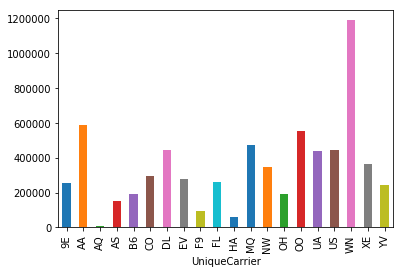

UniqueCarrier
WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
dtype: int64

In [169]:
final_df = df[df['Cancelled'] == 0]
final_df.groupby('UniqueCarrier').size().plot(kind = 'bar')
plt.show()
req_df = df.groupby('UniqueCarrier').size().sort_values(ascending=False)
req_df[:10]

In [21]:
#No. of flights each day of the week
tab = pd.crosstab(df['Month'],df['DayOfWeek'])

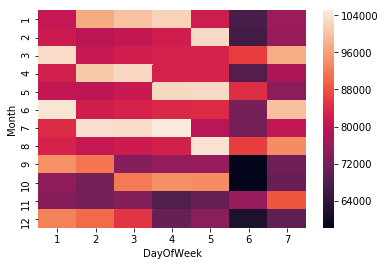

In [28]:
#plt.imshow(tab,cmap = 'seismic',interpolation = None)
#plt.show()
sns.heatmap(tab,)
plt.show()

In [167]:
df['UniqueCarrier'].head()

0    WN
1    WN
2    WN
3    WN
4    WN
Name: UniqueCarrier, dtype: object

# Question #2 

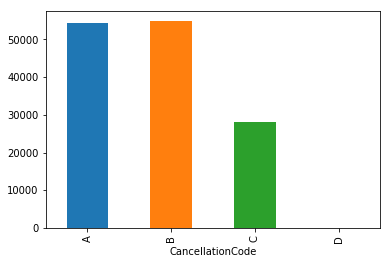

In [23]:

df.groupby('CancellationCode').size().plot(kind='bar')
plt.show()


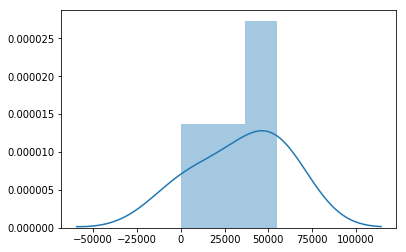

In [26]:
df_plot = df.groupby('CancellationCode').size()
sns.distplot(df_plot,bins=3)
plt.show()

# Question #3

In [168]:
df['Origin'].head()

0    IAD
1    IAD
2    IND
3    IND
4    IND
Name: Origin, dtype: object

In [29]:
df['Dest'].head()

0    TPA
1    TPA
2    BWI
3    BWI
4    BWI
Name: Dest, dtype: object

In [171]:
df['Route'] = df['Origin'] + '-' + df['Dest']

In [172]:
df['Route'].head()

0    IAD-TPA
1    IAD-TPA
2    IND-BWI
3    IND-BWI
4    IND-BWI
Name: Route, dtype: object

In [173]:
df.groupby('Route').size().sort_values(ascending = False).head()


Route
SFO-LAX    13788
LAX-SFO    13390
OGG-HNL    12383
LGA-BOS    12035
BOS-LGA    12029
dtype: int64

# Question #4

In [109]:
req_df = df[(df['DepDelay']>0) & (df['WeatherDelay']>0)]
req_df.groupby('Route').size().sort_values(ascending=False)[:5]

Route
DTW-LGA    435
ORD-DFW    418
ORD-CVG    383
ORD-MSP    371
DTW-ORD    370
dtype: int64

646

# Question #5    

In [114]:
df['DepTime'][df['DepTime']>0].head()

4     1829.0
6     1937.0
11    1644.0
16    1452.0
18    1323.0
Name: DepTime, dtype: float64

In [15]:
delayed_routes = df[df['DepDelay']>0]
top_five = delayed_routes.groupby('Route').size().sort_values(ascending = False).head()

In [22]:
#top_five
count = 0
for i in range(len(delayed_routes['Route'])):
    if delayed_routes['Route'].iloc[i] in top_five:
        if delayed_routes['WeatherDelay'].iloc[i] > 0:
            count+=1

In [23]:
count

668

# Question #6

In [96]:
df['DepTime-hrs'] = df['DepTime']//100

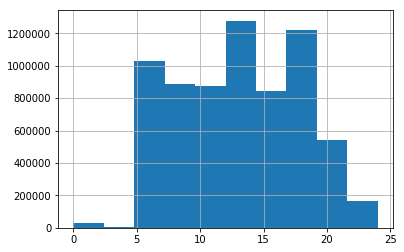

In [97]:
#df.groupby('DepTime-hrs').size().plot(kind = 'bar')
df['DepTime-hrs'].hist()
plt.show()

In [31]:
df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
CRSDepTime,1955,735,620,930,1755
ArrTime,2211,1002,804,1054,1959
CRSArrTime,2225,1000,750,1100,1925
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920


# Question #8 and #9

In [89]:
#df[df['CarrierDelay'].isna()]=0
req_df = df[df['CancellationCode']=='A']

#req_df
req_df.groupby('UniqueCarrier').size().sort_values(ascending=False)

UniqueCarrier
AA    9609
WN    6554
UA    6352
YV    5020
9E    4329
US    3857
MQ    3644
OO    3162
DL    3113
EV    1384
OH    1328
AS    1222
NW    1119
FL     815
CO     746
XE     697
B6     665
HA     563
F9     109
AQ      42
dtype: int64

# Question #10

In [94]:
req_df = df[(df['ArrDelay']>0) & (df['DepDelay']>0)]
req_df.groupby('UniqueCarrier').agg({'ArrDelay':'median','DepDelay':'median'})['DepDelay'].sort_values()

UniqueCarrier
AQ     9.0
HA     9.0
F9    13.0
WN    18.0
DL    18.0
AS    19.0
US    19.0
NW    19.0
FL    20.0
CO    20.0
OO    22.0
9E    25.0
XE    25.0
MQ    25.0
EV    26.0
AA    26.0
UA    28.0
OH    30.0
B6    31.0
YV    31.0
Name: DepDelay, dtype: float64

# Question #7

In [110]:
#new_df = df.set_index(['Month','CancellationCode'],inplace=False)

In [162]:
new_df = df.groupby(['CancellationCode','Month']).size()
_ , axes = plt.subplots(12,1)


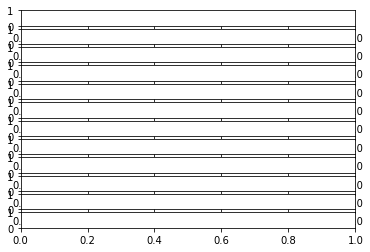

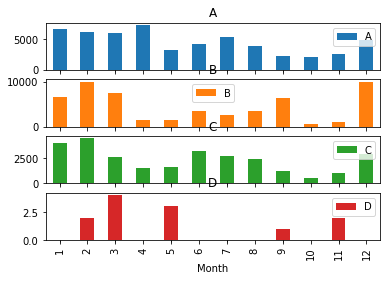

In [163]:

new_df.unstack(level=0).plot(kind = 'bar',subplots = True)
plt.show()
#ind_list = new_df.index.get_level_values(0).unique()
#for i in range(len(ind_list)):
#    new_df.xs(ind_list[i]).plot(kind='bar',axes = axes[i])

In [166]:
df.groupby('CancellationCode').size().sort_values(ascending=False)

CancellationCode
B    54904
A    54330
C    28188
D       12
dtype: int64